Titanic - Machine Learning from Disaster
Vamos a abordar el conjunto de datos "Titanic - Machine Learning from Disaster". Este es uno de los más populares en la comunidad de ciencia de datos y aprendizaje automático. Es proporcionado por Kaggle (https://www.kaggle.com/c/titanic) (también se puede descargar directamente de https://homl.info/titanic.tgz se puede una rutina que descarga y descomprima el archivo como el caso de los precios de la vivienda) y se utiliza comúnmente para aprender y practicar técnicas de análisis de datos, limpieza de datos, y algoritmos de aprendizaje automático.

A continuación se presentan los detalles clave del conjunto de datos:

Descripción del Conjunto de Datos
El conjunto de datos se basa en la tragedia del Titanic, que se hundió en 1912 después de chocar con un iceberg. Los datos contienen información sobre los pasajeros del Titanic y se utilizan para predecir la supervivencia de los pasajeros en base a ciertas características.

Columnas del Conjunto de Datos
El conjunto de datos tiene las siguientes columnas:

PassengerId: Identificador único para cada pasajero.
Survived: Indicador de supervivencia (0 = No, 1 = Sí).
Pclass: Clase del pasajero (1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase).
Name: Nombre del pasajero.
Sex: Género del pasajero.
Age: Edad del pasajero.
SibSp: Número de hermanos/cónyuges a bordo del Titanic.
Parch: Número de padres/hijos a bordo del Titanic.
Ticket: Número del billete.
Fare: Tarifa del pasajero.
Cabin: Número de cabina del pasajero.
Embarked: Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton).
Tareas a realizar
El objetivo principal de este conjunto de datos es predecir la columna "Survived" utilizando las demás columnas como características (features). Tenga en cuenta que este conjunto de datos ya está dividido en entrenamiento y prueba. Este es un problema clásico de clasificación binaria. Los pasos a realizar son los siguientes:

Exploración de Datos: Analizar y visualizar los datos para entender las relaciones entre las variables (por ejemplo: matriz de correlaciones, histogramas), identificar valores faltantes, variables categóricas.
Selección de Características: Decidir qué características son más relevantes para la predicción.
Limpieza de Datos: Manejar valores faltantes y convertir variables categóricas en variables numéricas.
Entrenamiento del Modelo: Elija un algoritmo de aprendizaje automático para clasificación, como regresión logística, árboles de decisión, bosques aleatorios, o máquinas de soporte vectorial (recuerde que el objetivo es entrenar un clasificador que pueda predecir la columna "Survived" basándose en las demás columnas). Utilice grid search, o random search para probar diferentes hiperparámetros en el modelo seleccionado.
Evaluación del Modelo en el Conjunto de Prueba: Evaluar en el conjunto de prueba el mejor modelo obtenido previamente.
Recursos Adicionales
Página del Competencia en Kaggle
Documentación y Tutoriales en Kaggle

In [1]:
# cargar los Datos

from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://homl.info/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

train_data, test_data = load_titanic_data()

In [2]:
# Observemos las 5 primeras filas

train_data.drop(['PassengerId'],axis=1,inplace=True)

In [3]:
# Analicemos tipos de variables y datos faltantes

train_data.drop(['Survived'],axis=1,inplace=True)

In [4]:
# Analicemos los atributos numéricos:

train_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.416700,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
# Analicemos la variable objetivo

train_data, test_data = load_titanic_data() # Vuelva a cargar los datos para recuperar la columna "Sobreviviente"

train_data["Survived"].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
# Analicemos las variables categóricas:

print(train_data["Pclass"].value_counts())

print(train_data["Sex"].value_counts())

print(train_data["Embarked"].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


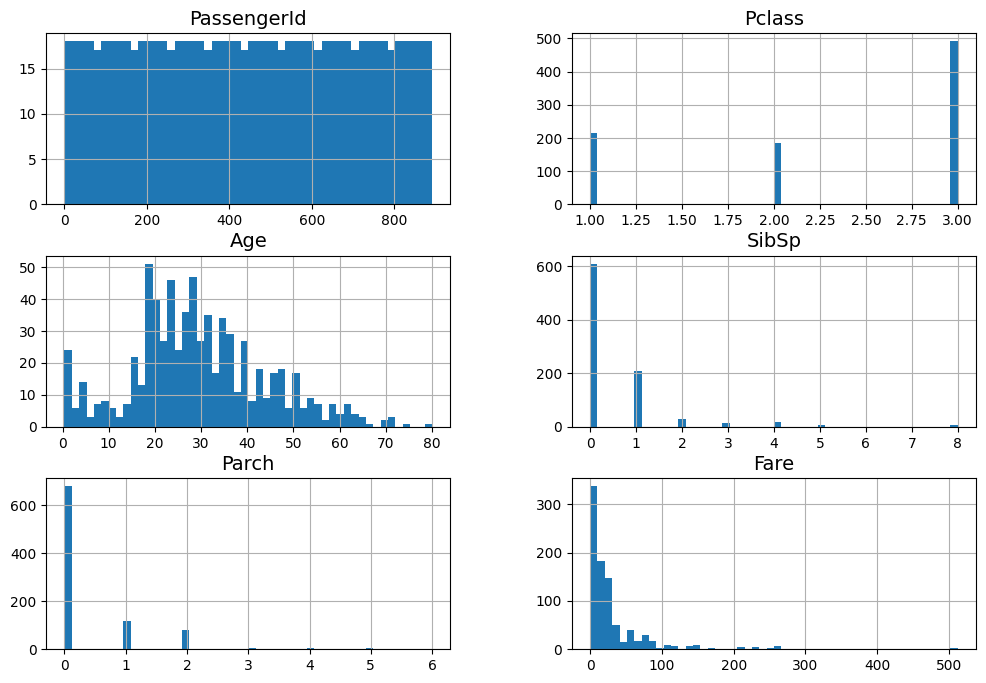

In [12]:
# Realice el histograma de las variables numéricas
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

if 'Survived' in train_data.columns:
    train_data.drop(['Survived'], axis=1).hist(bins=50, figsize=(12, 8))
else:
    # Handle the case where 'Survived' column is not present
    print("The 'Survived' column is not in the DataFrame.")
    train_data.hist(bins=50, figsize=(12, 8))  # Plot histogram without dropping

plt.show()

In [14]:
train_data["PassengerId"]

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

2. SELECCION DE CARACTERISTICAS


In [15]:
# Puede "soltar" las características que considere no relevantes con la función drop

# Ejemplo train_data.drop[('Característica_1'),inplace=True]

train_data.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [17]:
#Seleccionar etiquetas (clases) y Matriz de caracteristicas

x = train_data.drop(['Survived'],axis=1)
y = train_data['Survived']

In [18]:
# prompt: Mediante el marco de datos x:

x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.416700,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# prompt: Mediante el marco de datos y:

y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

3. LIMPIEZA DE DATOS


In [20]:
# Cree un pipeline para las variables categóricas:
# aplique primero imputación y convierta a variables numéricas

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

numeric_features = ['Age','SibSp','Parch', 'Farg']
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

In [23]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Sex', 'Embarked','Pclass']

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), # Fixed typo here, it should be "most_frequent"
    OneHotEncoder(handle_unknown="ignore"))

In [24]:
# Crear un solo transformardor que maneje las variables categóricas y las numéricas
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer
import numpy as np

# Assuming num_pipeline and cat_pipeline are already defined
preprocessing = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numeric_features),
        ('cat', cat_pipeline, categorical_features),
    ]
)

In [26]:
numeric_features = ['Age','SibSp','Parch', 'Fare'] # Changed 'Farg' to 'Fare'
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

4. ENTRENAMIENTO DE MODELO

In [27]:
# Seleccione algún modelo
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC


In [28]:
# Utilice grid search o random search para probar diferentes hiperparámetros
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform, geom, expon
from sklearn.pipeline import Pipeline

5. EVALUACION DE MODELO EN EL CONJUNTO DE PRUEBA


In [29]:
# Guardar predicciones como .csv y subir a Kaggle para evaluar el resultado
# https://www.kaggle.com/competitions/titanic/submissions

# resultado = test_data[['PassengerId']].copy()
# resultado['Survived'] = y_pred
# resultado.to_csv('y_pred.csv', index=False)